# Simple Classifier / Logistic Regression

After having worked with the Dataloading, we want to start to take a more detailed look into how the training process looks like. So far, our tools are limited and we must restrict ourselves to a simplified model. But nevertheless, this gives us the opportunity to look at the different parts of the training process in more detail and builds up a good base when we turn to more complicated model architectures in the next exercises. 

This notebook will demonstrate a simple logistic regression model predicting whether a house is ```low-priced``` or ```expensive```. The data that we will use here is the HousingPrice dataset. Feeding some features in our classifier, the output should then be a score that determines in which category the considered house is.


Before we start, let us first import some libraries and code that we will need along the way. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 0. Dataloading and Data Preprocessing

Let us load the data that we want to use for our training. The method `get_housing_data()` is providing you with a training, validation and test set that is ready to use.

For more information about how to prepare the data and what the final data look like, you can have a look at the notebook `housing_data_preprocessing(optional).ipynb `. We reduced our data and the remaining houses in our dataset are now either labeled with ```1``` and hence categorized as ```expensive```, or they are labeled with ```0``` and hence categorized as ```low-priced```.


In [2]:
from dl_zero2one.networks.utils import *

X_train, y_train, X_val, y_val, X_test, y_test, train_dataset = get_housing_data()

print("train data shape:", X_train.shape)
print("train targets shape:", y_train.shape)
print("val data shape:", X_val.shape)
print("val targets shape:", y_val.shape)
print("test data shape:", X_test.shape)
print("test targets shape:", y_test.shape, '\n')

print('The original dataset looks as follows:')
train_dataset.df.head()

You successfully loaded your data! 

train data shape: (1048, 1)
train targets shape: (1048, 1)
val data shape: (358, 1)
val targets shape: (358, 1)
test data shape: (363, 1)
test targets shape: (363, 1) 

The original dataset looks as follows:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2216,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,220000
836,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143000
2396,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000
1962,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,NaN,MnWw,NaN,0,4,2007,WD,Family,135000
305,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776


The data is now ready and can be used to train our classifier model.

## 1. Set up a Classifier Model

Let $\mathbf{X} \in \mathbb{R}^{N\times (D+1)}$ be our data with $N$ samples and $D$ feature dimensions. With our classifier model, we want to predict binary labels $\mathbf{\hat{y}} \in \mathbb{R}^{N\times 1}$. Our classifier model should be of the form

$$ \mathbf{\hat{y}}  = \sigma \left( \mathbf{X} \cdot \mathbf{w} \right), $$ 

$ $ where $\mathbf{w}\in \mathbb{R}^{(D+1) \times 1}$ is the weight matrix of our model.

The **sigmoid function** $\sigma: \mathbb{R} \to [0, 1]$, defined by 

$$ \sigma(t) = \frac{1}{1+e^{-t}}, $$

is used to squash the outputs of the linear layer into the interval $[0, 1]$. Remember that the sigmoid function is a real-valued function. When applying it on a vector, the sigmoid is operating component-wise.

The output of the sigmoid function can be seen as the probability that our sample is indicating a house that can be categorized as ```expensive```. As the probability gets closer to 1, our model is more confident that the input sample is in the class ```expensive```.

<img src="https://miro.medium.com/max/2400/1*RqXFpiNGwdiKBWyLJc_E7g.png" width="800">


In the ```Classifier``` class in  ```dl_zero2one/networks/classifier.py``` a basic classifier is implemented. We can define the number of features that our classifier model takes as input.

## 2. Loss: Binary Cross Entropy

For a binary classification like our task, we use a loss function called Binary Cross-Entropy (BCE).

$$BCE(y,\hat{y}) =- y \cdot log(\hat y ) - (1- y) \cdot log(1-\hat y) $$

where $y\in\mathbb{R}$ is the ground truth and $\hat y\in\mathbb{R}$ is the predicted probability of the house being expensive.

Since the BCE function is a non-convex function, there is no closed-form solution for the optimal weights vector. In order to find the optimal parameters for our model, we need to use numeric methods such as Gradient Descent. But let us have a look at that later. First, you have to complete your first task:

Check out the BCE loss in ```dl_zero2one/networks/loss.py``` (forward and backward pass)


In [3]:
from dl_zero2one.networks.loss import BCE

bce_loss = BCE()

## 3. Backpropagation

The backpropagation algorithm allows the information from the loss flowing backward through the network in order to compute the gradient of the loss function $L$ w.r.t the weights $w$ of the model. 

The key idea of backpropagation is decomposing the derivatives by applying the chain rule to the loss function.

$$ \frac{\partial L(w)}{\partial w} = \frac{\partial L(w)}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w}$$

We have already implemted the `forward()` and `backward()` pass of the loss function, which can be used to compute the derivative  $\frac{\partial L(w)}{\partial \hat y}$. In order to compute the second term $\frac{\partial \hat y}{\partial w}$, we use a similar `forward()` and `backward()` method in our `Classifier` class.

### Backward Pass

The backward pass consists of computing the derivative $\frac{\partial \hat y}{\partial w}$. Again, we can decompose this derivative by the chain rule: For $s = X \cdot w$ we obtain

$$\frac{\partial \hat y}{\partial w} = \frac{\partial \sigma(s)}{\partial w} = \frac{\partial \sigma(s)}{\partial s} \cdot \frac{\partial s}{\partial w}$$


**Hint:** Taking track of the dimensions in higher-dimensional settings can make the task a little bit complicated. We need to understand the operations here. First we need to understand the forward and backward pass if the input is only one sample consisting of $D+1$ features. Then our data matrix has dimension $X \in \mathbb{R}^{1 \times (D+1)}$. Second we can go back to the setting where our data matrix has dimension $X \in \mathbb{R}^{N \times (D+1)}$ and consists of $N$ samples each having $D+1$ features.

## 4. Optimizer and Gradient Descent

Previously, we have successfully dealt with the loss function, which is a method of measuring how well our model fits the given data. The idea of the training process is to adjust iteratively the weights of our model in order to minimize the loss function. 

And this is where the optimizer comes in. In each training step, the optimizer updates the weights of the model w.r.t. the output of the loss function, thereby linking the loss function and model parameters together. The goal is to obtain a model which is accurately predicting the class for a new sample.


Any discussion about optimizers needs to begin with the most popular one, and it's called Gradient Descent. This algorithm is used across all types of Machine Learning (and other math problems) to optimize. It's fast, robust, and flexible. Here's how it works:


0. Initialize the weights with random values.
1. Calculate loss with the current weights and the loss function.
2. Calculate the gradient of the loss function w.r.t. the weights.
3. Update weights with the corresponding gradient.
4. Iteratively perform Step 1 to 3 until converges.

The name of the optimizer already hints at the required concept: We use gradients which are very useful for minimizing a function. The gradient of the loss function w.r.t to the weights $w$ of our model tells us how to change our weights $w$ in order to minimize our loss function. 

The weights are updated each step as follows:
$$ w^{(n+1)} = w^{(n)} - \alpha \cdot \frac {dL}{dw}, $$
where $ \frac {dL}{dw}$ is the gradient of your loss function w.r.t. the weights $w$ and $\alpha$ is the learning rate which is a predefined positive scalar determining the size of the step.


In our model, we will use gradient descent to update the weights. Take a look at the ```Optimizer``` class in the file ```networks/optimizer.py```. The gradient descent step is implemented in the ```step()``` method. 

## 5. Training

We have now implemented all the necessary parts of our training process, namely:
- **Classifier Model:** We set up a simple classifier model and you implemented the corresponding ```forward()``` and ```backward()``` methods.
- **Loss function:** We chose the Binary Cross Entropy Loss for our model to measure the distance between the prediction of our model and the ground-truth labels. You implemented a forward and backward pass for the loss function.
- **Optimizer**: We use the Gradient Descent method to update the weights of our model. Here, you implemented the ```step()``` function which performs the update of the weights. 


Regarding weight initialization: we randomly initializes the weights of our classifier model. Later, we will use more efficient methods to initialize the weights. But for now, a random initialization as it happens in the ```initialize_weights()``` method is sufficient.


Let's start with our classifier model and look at its performance before any training happened. 

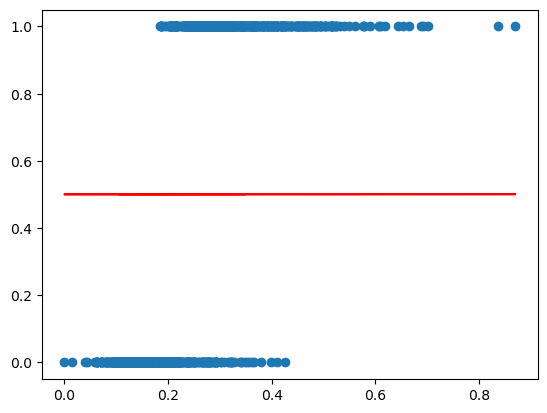

In [4]:
from dl_zero2one.networks.classifier import Classifier

#initialization
model = Classifier(num_features=1)
model.initialize_weights()

y_out, _ = model(X_train)

# plot the prediction
plt.scatter(X_train, y_train)
plt.plot(X_train, y_out, color='r')

As we can see the predictions of our model without any training are very bad. Let's see how the performance improves when we start our training, which means that we update our weights by applying the gradient descent method. The following cell combines the forward- and backward passes with the gradient update step and performs a training step for our classifier:


Note that the ```Classifier``` class is derived from the more general ```Network``` class. It is worth having a look at the basis class ```Network``` in the file ```dl_zero2one/networks/base_networks.py```. We will make use of the ```__call__()``` method, which computes the forward and backward pass of your classifier. In a similar manner, we use the ```__call__()``` function for our Loss function.


The following cell performs training with 400 training steps:

In [5]:
from dl_zero2one.networks.optimizer import *
from dl_zero2one.networks.classifier import *
# Hyperparameter Setting, we will specify the loss function we use, and implement the optimizer we finished in the last step.
num_features = 1

# initialization
model = Classifier(num_features=num_features)
model.initialize_weights()

loss_func = BCE() 
learning_rate = 5e-1
loss_history = []
opt = Optimizer(model,learning_rate)

steps = 400
# Full batch Gradient Descent
for i in range(steps):
    
    # Enable your model to store the gradient.
    model.train()
    
    # Compute the output and gradients w.r.t weights of your model for the input dataset.
    model_forward, model_backward = model(X_train)
    
    # Compute the loss and gradients w.r.t output of the model.
    loss, loss_grad = loss_func(model_forward, y_train)
    
    # Use back prop method to get the gradients of loss w.r.t the weights.
    grad = loss_grad * model_backward
    
    # Compute the average gradient over your batch
    grad = np.mean(grad, 0, keepdims = True)

    # After obtaining the gradients of loss with respect to the weights, we can use optimizer to
    # do gradient descent step.
    # Take transpose to have the same shape ([D+1,1]) as weights.
    opt.step(grad.T)
    
    # Average over the loss of the entire dataset and store it.
    average_loss = np.mean(loss)
    loss_history.append(average_loss)
    if i%10 == 0:
        print("Epoch ",i,"--- Average Loss: ", average_loss)


Epoch  0 --- Average Loss:  0.6931896991724897
Epoch  10 --- Average Loss:  0.6841037468351105
Epoch  20 --- Average Loss:  0.6755342624373963
Epoch  30 --- Average Loss:  0.6672715351422882
Epoch  40 --- Average Loss:  0.6592931566782693
Epoch  50 --- Average Loss:  0.6515876003379939
Epoch  60 --- Average Loss:  0.6441441711652186
Epoch  70 --- Average Loss:  0.6369524656064102
Epoch  80 --- Average Loss:  0.6300023679804804
Epoch  90 --- Average Loss:  0.6232840712628336
Epoch  100 --- Average Loss:  0.6167880936032102
Epoch  110 --- Average Loss:  0.6105052895856771
Epoch  120 --- Average Loss:  0.6044268567954993
Epoch  130 --- Average Loss:  0.5985443383383181
Epoch  140 --- Average Loss:  0.5928496219408043
Epoch  150 --- Average Loss:  0.587334936224387
Epoch  160 --- Average Loss:  0.5819928446931584
Epoch  170 --- Average Loss:  0.5768162379192188
Epoch  180 --- Average Loss:  0.5717983243482831
Epoch  190 --- Average Loss:  0.5669326200888627
Epoch  200 --- Average Loss:  0.

We can see that our average loss is decreasing as expected. Let us visualize the average loss and the prediction after our short training:

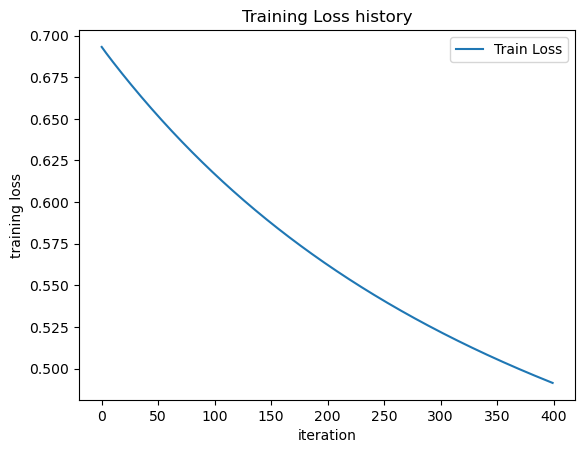

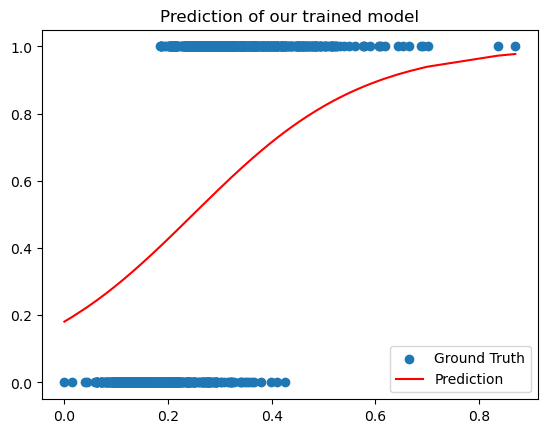

In [6]:
# Plot the loss history to see how it goes after several steps of gradient descent.
plt.plot(loss_history, label = 'Train Loss')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.legend()
plt.show()


# forward pass
y_out, _ = model(X_train)


# plot the prediction
plt.scatter(X_train, y_train, label = 'Ground Truth')
inds = X_train.argsort(0).flatten()
plt.plot(X_train[inds], y_out[inds], color='r', label = 'Prediction')
plt.title('Prediction of our trained model')
plt.legend()
plt.show()

This looks pretty good already and our model gets better in explaining the underlying relationship of data.

## 6. Solver

Now we want to put everything we have learned so far together in an organized and concise way, that provides easy access to train a network/model in your own script/code. The purpose of a solver is mainly to provide an abstraction for all the gritty details behind training your parameters, such as logging your progress, optimizing your model, and handling your data.

This part of the exercise will require you to complete the missing code in the ```Solver``` class and to train your model end to end.


Open the file `dl_zero2one/solver.py` and have a look at the `Solver` class. The `_step()` function is representing one single training step. So when using the Gradient Descent method, it represents one single update step using the Gradient Descent method. 

In [7]:
from dl_zero2one.solver_minimal import Solver
from dl_zero2one.networks.classifier import Classifier
from dl_zero2one.tests.solver_tests import *
weights = np.array([[0.1],[0.1]])
TestClassifier = Classifier(num_features=1)
TestClassifier.initialize_weights(weights)
learning_rate = 5e-1
data = {'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val}
loss = BCE()
solver = Solver(TestClassifier,data,loss,learning_rate,verbose=True)

test_solver(solver)

Solver Step incorrect.
Expected: [[0.11574258], [0.0832162]]
Evaluated: [[0.11773185]
 [0.08432409]]
Test cases are still failing! Tests passed: 0/1
Score: 0/100


0

After having successfully implemented the `step()` function in the `Optimizer` class, let us now train our classifier. We train our model with a learning rate $ \lambda = 0.1$ and with 25000 epochs. Your model should reach an accuracy which is higher than 85%. 

Accuracy BEFORE training 46.3%


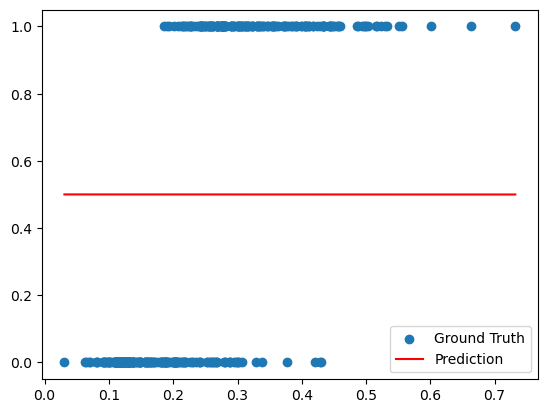

In [9]:
from dl_zero2one.solver_minimal import Solver
from dl_zero2one.networks.utils import test_accuracy
from dl_zero2one.networks.classifier import Classifier
# Select the number of features, you want your task to train on.
# Feel free to play with the sizes.
num_features = 1

# initialize model and weights
model = Classifier(num_features=num_features)
model.initialize_weights()

y_out, _ = model(X_test)

accuracy = test_accuracy(y_out, y_test)
print("Accuracy BEFORE training {:.1f}%".format(accuracy*100))


if np.shape(X_test)[1]==1:
    plt.scatter(X_test, y_test, label = "Ground Truth")
    inds = X_test.flatten().argsort(0)
    plt.plot(X_test[inds], y_out[inds], color='r', label = "Prediction")
    plt.legend()
    plt.show()

data = {'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val}

#We use the BCE loss
loss = BCE()


In [10]:
learning_rate = 2e-1
epochs = 1000000

# Setup for the actual solver that's going to do the job of training
# the model on the given data. set 'verbose=True' to see real time 
# progress of the training.
solver = Solver(model=model, 
                data=data, 
                loss_func=loss,
                learning_rate=learning_rate, 
                verbose=True, 
                print_every = 6000)
# Train the model, and look at the results.
solver.train(epochs)


# Test final performance
y_out, _ = model(X_test)

accuracy = test_accuracy(y_out, y_test)
print("Accuracy AFTER training {:.1f}%".format(accuracy*100))

(Epoch 0 / 1000000) train loss: 0.692818; val_loss: 0.692828
(Epoch 6000 / 1000000) train loss: 0.338489; val_loss: 0.357442
(Epoch 12000 / 1000000) train loss: 0.315178; val_loss: 0.337735
(Epoch 18000 / 1000000) train loss: 0.308789; val_loss: 0.333485
(Epoch 24000 / 1000000) train loss: 0.306412; val_loss: 0.332488
(Epoch 30000 / 1000000) train loss: 0.305398; val_loss: 0.332404
(Epoch 36000 / 1000000) train loss: 0.304931; val_loss: 0.332579
(Epoch 42000 / 1000000) train loss: 0.304706; val_loss: 0.332805
(Epoch 48000 / 1000000) train loss: 0.304594; val_loss: 0.333014
(Epoch 54000 / 1000000) train loss: 0.304537; val_loss: 0.333186
(Epoch 60000 / 1000000) train loss: 0.304508; val_loss: 0.333322
(Epoch 66000 / 1000000) train loss: 0.304493; val_loss: 0.333426
(Epoch 72000 / 1000000) train loss: 0.304485; val_loss: 0.333505
(Epoch 78000 / 1000000) train loss: 0.304481; val_loss: 0.333563
(Epoch 84000 / 1000000) train loss: 0.304479; val_loss: 0.333607
(Epoch 90000 / 1000000) train 

During the training process losses in each epoch are stored in the lists `solver.train_loss_history` and `solver.val_loss_history`. We can use them to plot the training result easily.

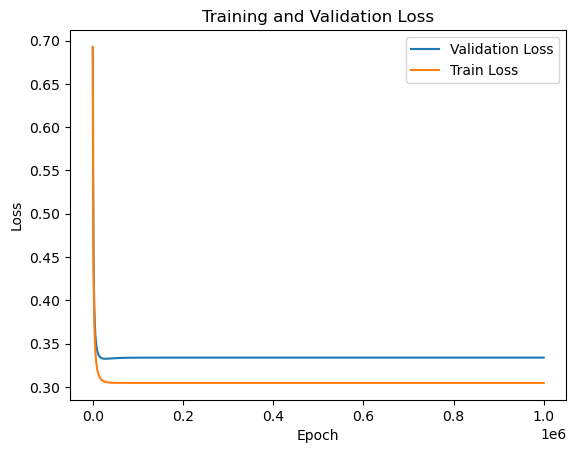

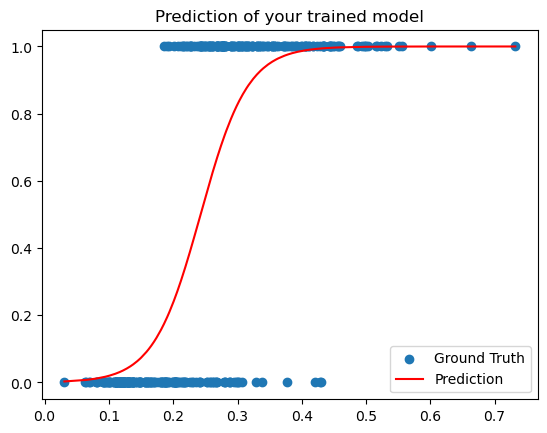

In [12]:
plt.plot(solver.val_loss_history, label = "Validation Loss")
plt.plot(solver.train_loss_history, label = "Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() 
plt.title('Training and Validation Loss')
plt.show() 


if np.shape(X_test)[1]==1:

    plt.scatter(X_test, y_test, label = "Ground Truth")
    inds = X_test.argsort(0).flatten()
    plt.plot(X_test[inds], y_out[inds], color='r', label = "Prediction")
    plt.legend()
    plt.title('Prediction of your trained model')
    plt.show()